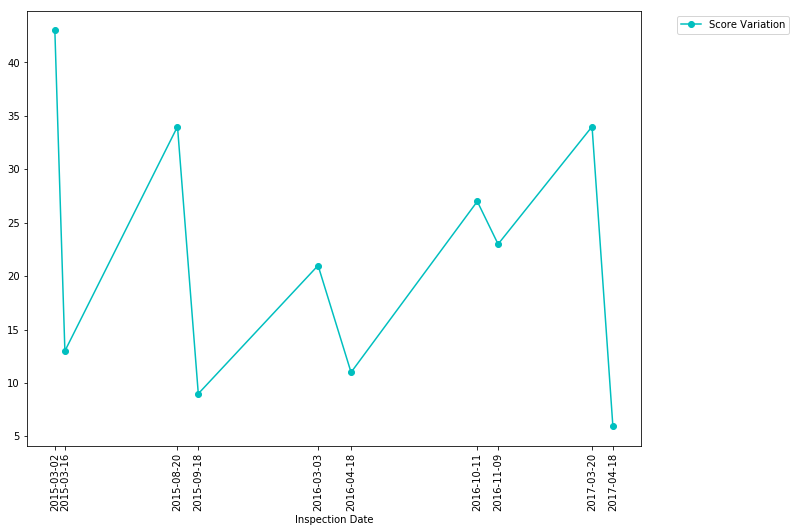

In [17]:
"""
    Get data for camis : It shows score variation for one particular restaurant over the period
"""

import pyodbc
import pprint
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

def get_data_for_camis(camis_id):
    cnxn = pyodbc.connect('DRIVER={Ingres};DATABASE=tc_tutorial;')
    cnxn.setdecoding(pyodbc.SQL_CHAR, encoding='utf-8')
    cnxn.setdecoding(pyodbc.SQL_WCHAR, encoding='utf-8')
    cnxn.setencoding(encoding='utf-8')
    cursor = cnxn.cursor()
    cursor.execute("select Inspection_Date, Max(Score) from Inspections where CAMIS = "+str(camis_id)+" group by Inspection_Date order by Inspection_Date")
    rows = cursor.fetchall()
    return list(rows)

data = get_data_for_camis(40391699)
# plot line chart to visualize the data
y = [element[1] for element in data]
x = [date2num(element[0]) for element in data]
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y, label='Score Variation', color='c', marker='o')
ax1.set_xticks(x)

ax1.set_xticklabels([element[0].strftime("%Y-%m-%d") for element in data], rotation =90)
plt.xlabel('Inspection Date')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))


plt.show()

In [18]:
"""
    Get restaurants and grade distribution for a zip code
"""
import pyodbc
import pprint

def get_grade_distribution_for_zip_code(zip_code):
    cnxn = pyodbc.connect('DRIVER={Ingres};DATABASE=tc_tutorial;')
    cnxn.setdecoding(pyodbc.SQL_CHAR, encoding='utf-8')
    cnxn.setdecoding(pyodbc.SQL_WCHAR, encoding='utf-8')
    cnxn.setencoding(encoding='utf-8')
    cursor = cnxn.cursor()
    # Get recent dates for all elegible restaurants
    # Inner join list with list above to get most recent data for eligible restaurant
    query = """
    Select ii.camis, ii.dba, ii.boro, ii.building, ii.grade, ii.inspection_date from ((select  camis, dba, boro, building, grade, inspection_date
    FROM Inspections) as ii
     INNER JOIN (select camis,
                 MAX(inspection_date) as inspection_date
            FROM Inspections  where zipcode = """+str(zip_code)+""" group By camis) as il ON ii.camis = il.camis and 
            ii.inspection_date = il.inspection_date)
    """
    cursor.execute(query)
    rows = cursor.fetchall()
    return list(rows)


pprint.pprint(get_grade_distribution_for_zip_code(10028))

[(41478388, '18 RESTAURANT', 'MANHATTAN', '240', 'B', datetime.date(2017, 1, 23)),
 (50047078, 'ABA SUSHI', 'MANHATTAN', '1588', 'A', datetime.date(2016, 12, 13)),
 (41666887, 'THAI @ LEX', 'MANHATTAN', '1244', 'A', datetime.date(2017, 5, 4)),
 (40581692, 'MAZ MEZCAL', 'MANHATTAN', '316', 'A', datetime.date(2016, 5, 6)),
 (50008548, 'CAFE JAX', 'MANHATTAN', '318', 'A', datetime.date(2017, 5, 25)),
 (50010049, 'SUBWAY', 'MANHATTAN', '1205', 'A', datetime.date(2017, 1, 30)),
 (50044385, 'MUNCHERY', 'MANHATTAN', '435', 'A', datetime.date(2016, 11, 2)),
 (41433265, 'WA JEAL', 'MANHATTAN', '1588', 'A', datetime.date(2016, 5, 25)),
 (41337836, 'ITHAKA', 'MANHATTAN', '308', 'A', datetime.date(2017, 6, 7)),
 (41542793, "LUKE'S LOBSTER", 'MANHATTAN', '242', None, datetime.date(2017, 6, 16)),
 (41433265, 'WA JEAL', 'MANHATTAN', '1588', 'A', datetime.date(2016, 5, 25)),
 (41710746, 'BURGERFI', 'MANHATTAN', '240', 'A', datetime.date(2017, 6, 26)),
 (40392162, 'BEYOGLU', 'MANHATTAN', '200', 'A', da

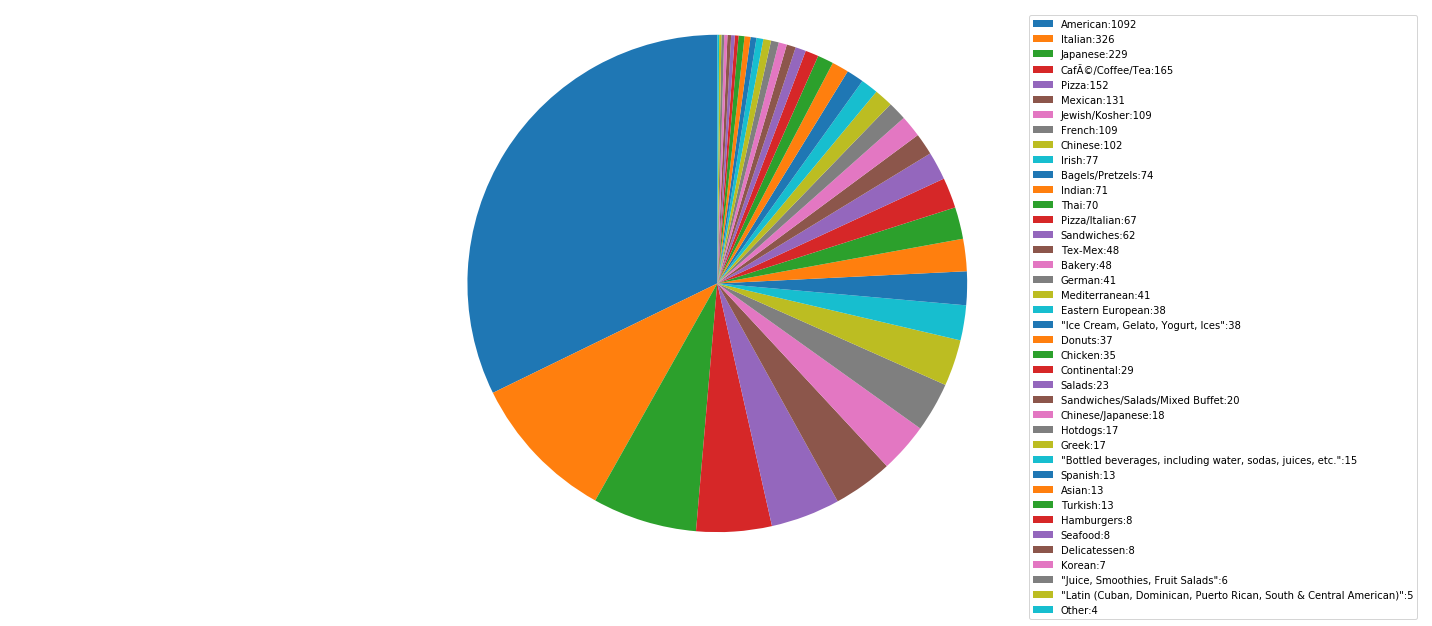

In [19]:
"""
    Get distribution of restaurants on basis of cuisine for a particular pin code
"""
import pyodbc
import pprint
import matplotlib.pyplot as plt

def get_restro_distribution_by_cuisine_for_zip_code(zip_code):
    cnxn = pyodbc.connect('DRIVER={Ingres};DATABASE=tc_tutorial;UID=actian')
    cnxn.setdecoding(pyodbc.SQL_CHAR, encoding='utf-8')
    cnxn.setdecoding(pyodbc.SQL_WCHAR, encoding='utf-8')
    cnxn.setencoding(encoding='utf-8')
    cursor = cnxn.cursor()
    query = """
    Select cuisine, count(*) as c
            from Inspections  where zipcode = """+str(zip_code)+""" group By cuisine order by c desc
    """
    cursor.execute(query)
    rows = cursor.fetchall()
    return list(rows)

data = get_restro_distribution_by_cuisine_for_zip_code(10028)

# draw pie chart for better representation
labels = [element[0] + ":"+ str(element[1]) for element in data]
sizes =  [element[1] for element in data]
fig1 = plt.figure(figsize=(20,8))
ax1 = plt.subplot()
patches, texts  = ax1.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#pprint.pprint()


In [20]:
"""
     Get list of restaurants with most recent grade as 'A' for particular cuisine
"""
import pyodbc
import pprint

def get_best_restro(zip_code, cuisine):
    cnxn = pyodbc.connect('DRIVER={Ingres};DATABASE=tc_tutorial;')
    cnxn.setdecoding(pyodbc.SQL_CHAR, encoding='utf-8')
    cnxn.setdecoding(pyodbc.SQL_WCHAR, encoding='utf-8')
    cnxn.setencoding(encoding='utf-8')
    cursor = cnxn.cursor()
    # Get recent dates for all elegible restaurants
    # Inner join list with list above to get most recent data for eligible restaurant
    query = """
    Select ii.camis, ii.dba, ii.boro, ii.building, ii.grade, ii.inspection_date from ((select  camis, dba, boro, building, grade, inspection_date
    FROM Inspections) as ii
     INNER JOIN (select camis,
                 MAX(inspection_date) as inspection_date
            FROM Inspections  where zipcode = """+str(zip_code)+""" and cuisine = '"""+cuisine+"""' and  
            grade = 'A' group By camis) as il ON ii.camis = il.camis and 
            ii.inspection_date = il.inspection_date)
    """
   
    cursor.execute(query)
    rows = cursor.fetchall()
    return list(rows)


pprint.pprint(get_best_restro(10028, 'Indian'))

[(41571258, 'INDIAN TANDOOR OVEN', 'MANHATTAN', '175', 'A', datetime.date(2016, 9, 8)),
 (41593315, 'MUMTAZ', 'MANHATTAN', '1582', 'A', datetime.date(2017, 4, 18)),
 (41571021, 'OM INDIAN RESTAURANT', 'MANHATTAN', '1593', 'A', datetime.date(2015, 9, 22)),
 (41593315, 'MUMTAZ', 'MANHATTAN', '1582', 'A', datetime.date(2017, 4, 18)),
 (41571021, 'OM INDIAN RESTAURANT', 'MANHATTAN', '1593', 'A', datetime.date(2015, 9, 22)),
 (41571021, 'OM INDIAN RESTAURANT', 'MANHATTAN', '1593', 'A', datetime.date(2015, 9, 22)),
 (41593315, 'MUMTAZ', 'MANHATTAN', '1582', 'A', datetime.date(2017, 4, 18)),
 (41571021, 'OM INDIAN RESTAURANT', 'MANHATTAN', '1593', 'A', datetime.date(2015, 9, 22)),
 (41571021, 'OM INDIAN RESTAURANT', 'MANHATTAN', '1593', 'A', datetime.date(2015, 9, 22))]
